### Model Summary
- Train on 02-01-2019 ; Score on 02-01-2020
- XGB Regression on y^(0.5) with inputs X
- Current train/score is missing web, dynamic mintigo, and gsem data


### Analysis Summary:
>

In [0]:
%pip install eli5
%pip install h2o==3.32.1.2
%pip install shap
%pip install xgboost
%pip install hyperopt
%pip install h2o-pysparkling-3.2==3.36.0.4.post1


%pip install mlflow==1.24.0
%pip install faker
%pip install bayesian-optimization
%pip install /dbfs/FileStore/jars/82a8f80e_8266_43fb_be3c_12ac7a64dc2d/maas_utils-0.2.0-py3-none-any.whl
%pip install /dbfs/FileStore/jars/c330e75c_b248_48a4_a6f0_01ffd076d1ab/maas_utils-0.1.5-py3-none-any.whl


Python interpreter will be restarted.
Requirement already satisfied: eli5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b5a1166e-2dbe-4eb0-a847-6f616ff0be4e/lib/python3.8/site-packages (0.13.0)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from eli5) (1.15.0)
Requirement already satisfied: scikit-learn>=0.20 in /databricks/python3/lib/python3.8/site-packages (from eli5) (0.24.1)
Requirement already satisfied: attrs>17.1.0 in /databricks/python3/lib/python3.8/site-packages (from eli5) (20.3.0)
Requirement already satisfied: graphviz in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b5a1166e-2dbe-4eb0-a847-6f616ff0be4e/lib/python3.8/site-packages (from eli5) (0.20.1)
Requirement already satisfied: numpy>=1.9.0 in /databricks/python3/lib/python3.8/site-packages (from eli5) (1.20.1)
Requirement already satisfied: tabulate>=0.7.7 in /databricks/python3/lib/python3.8/site-packages (from eli5) (0.8.7)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from eli5) (1.6.2)
Requirement already satisfied: jinja2>=3.0.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b5a1166e-2dbe-4eb0-a847-6f616ff0be4e/lib/python3.8/site-packages (from eli5) (3.1.2)
Requirement already satisfied: MarkupSafe>=2.0 in /databricks/python3/lib/python3.8/site-packages (from jinja2>=3.0.0->eli5) (2.0.1)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=0.20->eli5) (1.0.1)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=0.20->eli5) (2.1.0)
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: h2o==3.32.1.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b5a1166e-2dbe-4eb0-a847-6f616ff0be4e/lib/python3.8/site-packages (3.32.1.2)
Requirement already satisfied: requests in /databricks/python3/lib/python3.8/site-packages (from h2o==3.32.1.2) (2.25.1)
Requirement already satisfied: future in /databricks/python3/lib/python3.8/site-packages (from h2o==3.32.1.2) (0.18.2)
Requirement already satisfied: tabulate in /databricks/python3/lib/python3.8/site-packages (from h2o==3.32.1.2) (0.8.7)
Requirement already satisfied: colorama>=0.3.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b5a1166e-2dbe-4eb0-a847-6f616ff0be4e/lib/python3.8/site-packages (from h2o==3.32.1.2) (0.4.5)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.32.1.2) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.32.1.2) (2.10)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.32.1.2) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.32.1.2) (4.0.0)
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: shap in /databricks/python3/lib/python3.8/site-packages (0.40.0)
Requirement already satisfied: numba in /databricks/python3/lib/python3.8/site-packages (from shap) (0.55.1)
Requirement already satisfied: cloudpickle in /databricks/python3/lib/python3.8/site-packages (from shap) (1.6.0)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from shap) (1.6.2)
Requirement already satisfied: tqdm>4.25.0 in /databricks/python3/lib/python3.8/site-packages (from shap) (4.59.0)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from shap) (1.20.1)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from shap) (1.2.4)
Requirement already satisfied: slicer==0.0.7 in /databricks/python3/lib/python3.8/site-packages (from shap) (0.0.7)
Requirement already satisfied: packaging>20.9 in /databri

In [0]:
from mass_utils import pyspark_helpers as pysh
from mass_utils import databricks_helpers as dbh
from datetime import datetime as dt
import math
from pyspark.sql.functions import regexp_replace, col
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from pyspark.ml import Pipeline
from pyspark.ml.feature import SQLTransformer
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OXGBoostEstimator
import pyspark.sql.functions as f
from h2o.automl import H2OAutoML
import eli5
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances
import shap
import random
import pprint
from sklearn.metrics import r2_score




In [0]:
print("arrow enabled?", spark.conf.get("spark.sql.execution.arrow.enabled"))
print("arrow batch size ?", spark.conf.get("spark.sql.execution.arrow.maxRecordsPerBatch"))
spark.conf.set("spark.sql.execution.arrow.enabled", "True")
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "4096")# Enable Arrow support.
spark.conf.set("spark.sql.execution.arrow.fallback.enabled", "true")# Enable Arrow support.
spark.conf.set("spark.sql.files.maxPartitionBytes", "16777216")

arrow enabled? True
arrow batch size ? 4096

In [0]:
# grab all data from calendar table


score_tbl_name = 'curr_cust_spend_score_score_regression_original_dv_tweedie_bayes_optim'
spark.sql('refresh table ' + score_tbl_name)
dv = 'dv'
# df_spark = spark.sql('select * from ' + score_tbl_name + ' where revenue_segment = "Large Enterprise"')
df_spark = spark.sql('select * from ' + score_tbl_name)
df_spark.createOrReplaceTempView("data")

# convert to pandas
df_pd = df_spark.toPandas()




In [0]:
string_features = ['industry_grouping','theater','revenue_segment']
numerical_features = ['site_employee_count'
,'days_since_last_product_purchase'
,'days_since_last_renewal_purchase'
,'days_since_last_purchase'
,'days_since_first_product_purchase'
,'days_since_first_renewal_purchase'
,'days_since_first_purchase'

                      
,'last_year_total_qty_forecast_group_gbb_best'
,'last_year_total_qty_forecast_group_traffic_management'
,'last_year_total_qty_forecast_group_other_services'
,'last_year_total_qty_forecast_group_asm'
,'last_year_total_spend_forecast_group_consulting'
,'last_year_total_qty_forecast_group_consulting'
,'last_year_total_qty_forecast_group_apm'
,'last_year_total_qty_forecast_group_training'
,'last_year_total_qty_forecast_group_big_iq'
,'last_year_total_qty_forecast_group_subsc_ipi'
,'last_year_total_qty_forecast_group_viprion'
,'last_year_total_qty_forecast_group_gbb_better'
,'last_year_total_qty_forecast_group_subsc_ve_ngx_pls'
,'last_year_total_qty_forecast_group_subsc_ve_ngx_pls_modwaf'
,'last_year_total_qty_forecast_group_awf'
,'last_year_total_qty_forecast_group_fw'
                      
,'total_spend_forecast_group_asm'
,'total_qty_forecast_group_apm'
,'total_qty_forecast_group_traffic_management'
,'total_spend_forecast_group_other_services'
,'total_qty_forecast_group_gbb_best'
,'total_qty_forecast_group_big_iq'
,'total_spend_forecast_group_training'
  
,'avg_days_between_product_opps'
,'avg_days_between_renewal_opps'
,'avg_days_complete_product_sales_cycle'
,'avg_days_complete_renewal_sales_cycle'
,'last_6months_avg_booking_amount'
,'last_year_booking_amount'
,'last_3years_avg_booking_amount'
,'last_5years_avg_booking_amount'
,'qty_purchased_last_purchase'
,'dollars_spent_last_purchase'
,'days_since_first_swp_purchase'
,'days_since_latest_swp_purchase'
,'days_since_first_awf_silverline_purchase'
,'days_since_latest_awf_silverline_purchase'
,'last_year_product_price'
,'last_2years_product_price'
,'total_product_price_yoy_ratio'
,'last_qtr_product_price'
,'last_2qtrs_product_price'
,'total_product_price_qoq_ratio'
,'days_since_last_offline_success'
,'days_since_last_online_success'
,'days_since_last_security_success'
,'days_since_last_eng'
,'avg_time_between_successes'
,'count_engagements'
,'total_mktg_success_dates'
,'last_3months_mktg_success_dates'
,'last_3months_mktg_success_ratio'
,'security_engagements_ratio'
,'online_engagements_ratio'
,'offline_engagements_ratio'
,'engagements_per_lead_ratio'
,'tech_leads_ratio'
,'mid_rank_leads_ratio'
,'high_rank_leads_ratio'
,'netops_leads_ratio'
,'raw_num_security_leads'
,'num_leads'
,'num_person'
]


features_only = string_features + numerical_features
all_features = features_only + [dv]

In [0]:
##/dbfs/segmentation/seg_spend_/GBM_model_python_1619630877397_1

In [0]:
import h2o
from pysparkling import *
hc = H2OContext.getOrCreate()

# load the model
model_path = '/dbfs/segmentation/seg_spend_/GBM_model_python_1659982944832_86'
saved_model = h2o.load_model(model_path)
saved_model

Connecting to H2O server at http://10.139.64.22:9009 ... successful.
Warning: Your H2O cluster version is too old (5 months and 1 day)!Please download and install the latest version from http://h2o.ai/download/
-------------------------- --------------------------------------------
H2O_cluster_uptime: 3 hours 50 mins
H2O_cluster_timezone: Etc/UTC
H2O_data_parsing_timezone: UTC
H2O_cluster_version: 3.36.0.4
H2O_cluster_version_age: 5 months and 1 day !!!
H2O_cluster_name: sparkling-water-root_app-20220831180524-0000
H2O_cluster_total_nodes: 8
H2O_cluster_free_memory: 88.5 Gb
H2O_cluster_total_cores: 64
H2O_cluster_allowed_cores: 64
H2O_cluster_status: locked, healthy
H2O_connection_url: http://10.139.64.22:9009
H2O_connection_proxy: null
H2O_internal_security: False
Python_version: 3.8.10 final
-------------------------- --------------------------------------------

Sparkling Water Context:
 * Sparkling Water Version: 3.36.0.4-1-3.2
 * H2O name: root
 * cluster size: 8
 * list of used nodes:
 (executorId, host, port)
 ------------------------
 (0,10.139.64.23,54321)
 (1,10.139.64.24,54321)
 (2,10.139.64.25,54321)
 (3,10.139.64.26,54321)
 (4,10.139.64.27,54321)
 (5,10.139.64.28,54321)
 (6,10.139.64.29,54321)
 (7,10.139.64.30,54321)
 ------------------------

 Open H2O Flow in browser: Go to Spark UI > Sparkling Water tab > click Flow UI link

 
Out[6]: Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1659982944832_86


Model Summary: 
 number_of_trees number_of_internal_trees model_size_in_bytes min_depth max_depth mean_depth min_leaves max_leaves mean_leaves
-- ----------------- -------------------------- --------------------- ----------- ----------- ------------ ------------ ------------ -------------
 65 65 8100 3 3 3 4 8 5.21538


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 53637420581.99009
RMSE: 231597.54010349524
MAE: 31669.22748495423
RMSLE: 7.738602711360359
Mean Residual Deviance: 881.1719775641304

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 123545467738.08951
RMSE: 351490.3522688631
MAE: 35030.80069460182
RMSLE: 7.8053344841393795
Mean Residual Deviance: 927.4374444514293

Cross-Validation Metrics Summary: 
 mean sd cv_1_valid cv_2_valid cv_3_valid cv_4_valid cv_5_valid
---------------------- ----------- ----------- ------------ ------------ ------------ ------------ ------------
mae 35037 2615.47 32050 35660.5 32896.4 35999.2 38578.7
mean_residual_deviance 927.373 38.3756 874.462 914.962 939.915 927.431 980.097
mse 1.23785e+11 6.77722e+10 8.78449e+10 1.79561e+11 5.22812e+10 8.82903e+10 2.10946e+11
r2 0.285074 0.370516 0.553062 0.350442 0.570859 -0.340486 0.291492
residual_deviance 927.373 38.3756 874.462 914.962 939.915 927.431 980.097
rmse 341042 96664 296386 423746 228651 297137 459288
rmsle 7.80506 0.0542317 7.77524 7.73696 7.82627 7.88113 7.80571

Scoring History: 
 timestamp duration number_of_trees training_rmse training_mae training_deviance
--- ------------------- ---------- ----------------- ------------------ ------------------ -------------------
 2022-08-09 00:31:23 17.568 sec 0.0 437542.8648683584 54307.077130038364 2264.676453917013
 2022-08-09 00:31:23 17.696 sec 1.0 436800.1965123862 51862.69658937833 2054.4685857156355
 2022-08-09 00:31:23 17.777 sec 2.0 435917.6042748477 49755.23456359083 1898.8014500122147
 2022-08-09 00:31:23 17.861 sec 3.0 434675.0228824148 48334.559650055395 1784.6896712272758
 2022-08-09 00:31:24 17.954 sec 4.0 433104.5939082575 47378.10802336252 1711.3514376221015
--- --- --- --- --- --- ---
 2022-08-09 00:31:27 21.343 sec 42.0 258459.82388361663 32530.667723096358 902.9440403402693
 2022-08-09 00:31:27 21.441 sec 43.0 257528.34847335212 32596.860144488797 901.0390854155689
 2022-08-09 00:31:27 21.524 sec 44.0 262414.76445661933 32497.10241389523 900.8203386561464
 2022-08-09 00:31:27 21.614 sec 45.0 259162.85312249392 32551.95840346795 897.8083603383501
 2022-08

In [0]:
# pandas dfs to h2o dfs
x_score_h2o  = h2o.H2OFrame(df_pd[features_only])
score_h2o = h2o.H2OFrame(df_pd[all_features + ['spend_bins']])
perf_score = saved_model.model_performance(score_h2o[all_features])

perf_score

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Out[7]: 
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 112040648419.41763
RMSE: 334724.7352966578
MAE: 55164.15744301592
RMSLE: 7.455708572566722
Mean Residual Deviance: 1827.06760211488

### General Results on Scored Set

In [0]:
print("Total Current Accounts: ", df_pd.account_id.count())
print("Total Zero Spend Current Accounts: ", df_pd[df_pd[dv] ==0].account_id.count())
print("Total Spend Current Accounts: ", df_pd[df_pd[dv] > 0].account_id.count())

Total Current Accounts: 18475
Total Zero Spend Current Accounts: 13157
Total Spend Current Accounts: 5318

In [0]:
# r2 reps degree that adjusted_predicted & actual values are correlated
## R2 for each groupings

print("Original General r2: ", perf_score.r2())
print()
grouping_list = ['revenue_segment','theater','industry_grouping','spend_bins']
for group in grouping_list:
  for val in df_pd[group].unique().tolist():
    try:
      grp_msk = df_pd[group] == val
      n = df_pd[grp_msk].shape[0]
      p = df_pd[grp_msk].shape[1]

      r2 = r2_score(df_pd[grp_msk][dv], df_pd[grp_msk]['predict'])
      adjusted_r2 = 1 - ((1-r2) * ((n - 1) / (n - p - 1)))
      print(val + " R2: " + str(r2)) #, ", Adjusted R2: " + str(adjusted_r2))
    except TypeError:
      pass
  print()


Original General r2: 0.29953242354788256

Large Enterprise R2: 0.5721243228219832
Government R2: 0.2528267885684724
SMB R2: -0.017977498522296242
Mid-Market R2: -0.11527382981182299

NA R2: 0.6119745044066355
EMEA R2: 0.2574163619755746
LATAM R2: 0.1658840069761991
APAC R2: 0.36334199161215264
JAPAN R2: 0.04286747998123874
None R2: 0.0

Technology R2: 0.7427216647095722
Financial Services R2: 0.6176231515589272
Healthcare R2: 0.3499136745464745
Government R2: -0.07971964618282468
Media & Entertainment R2: 0.09007042323044123
Other R2: -0.5527506158761386
Telco R2: 0.2670489552907441
Retail R2: 0.22151935795216893
Education R2: -0.1310101155363903
Utilities/Transport R2: 0.16951666431044699
Manufacturing R2: 0.1770383634245053
Gov - Federal (US) R2: 0.41159226589497655
None R2: -0.10698930516564453

1.non_spend R2: -1787905.4714173581
3.low_med_spend R2: -12.355924842072636
4.med_spend R2: -4.096453434664097
2.low_spend R2: -722.1951780700713
5.med_high_spend R2: -17.380099465118764
6.high_spend R2: 0.28983566754330536

In [0]:
n = df_pd.shape[0]
p = df_pd.shape[1]
r2 = r2_score(df_pd[dv], df_pd['predict'])
adjusted_r2 = 1 - ((1-r2) * ((n - 1) / (n - p - 1)))

print(r2)
print(adjusted_r2)

0.5440736767726695
0.4940663806282014

In [0]:
# View mean and median errors

print("Summary using regular back transform results on model with new DV:\n")
print("General: ")
print("Total accounts: ", df_pd.account_id.count())
print("Mean abs error: ",df_pd['abs_residual'].mean())
print("Median abs error: ",df_pd['abs_residual'].median())

print()
print("General Spenders: ")
spend_mask = df_pd[dv] > 0
print("Total accounts: ", df_pd[spend_mask].account_id.count())
print("Mean abs error: ",df_pd[spend_mask]['abs_residual'].mean())
print("Median abs error: ",df_pd[spend_mask]['abs_residual'].median())

print()
minn = 1000000
maxx = float('inf')
print("Spenders between ", minn , " and " , maxx, ": ")
spend_mask_min = df_pd[dv] >= minn
spend_mask_max = df_pd[dv] <= maxx
print("Total accounts: ", df_pd[spend_mask_min&spend_mask_max].account_id.count())
print("Mean abs error: ",df_pd[spend_mask_min&spend_mask_max]['abs_residual'].mean())
print("Median abs error: ",df_pd[spend_mask_min&spend_mask_max]['abs_residual'].median())


print()
minn = 1000
maxx = 100000
print("Spenders between ", minn , " and " , maxx, ": ")
spend_mask_min = df_pd[dv] >= minn
spend_mask_max = df_pd[dv] <= maxx
print("Total accounts: ", df_pd[spend_mask_min&spend_mask_max].account_id.count())
print("Mean abs error: ",df_pd[spend_mask_min&spend_mask_max]['abs_residual'].mean())
print("Median abs error: ",df_pd[spend_mask_min&spend_mask_max]['abs_residual'].median())



print()
minn = 0
maxx = 999
print("Non-Spenders between ", minn , " and " , maxx, ": ")
spend_mask_min = df_pd[dv] >= minn
spend_mask_max = df_pd[dv] <= maxx
print("Total accounts: ", df_pd[spend_mask_min&spend_mask_max].account_id.count())
print("Mean abs error: ",df_pd[spend_mask_min&spend_mask_max]['abs_residual'].mean())
print("Median abs error: ",df_pd[spend_mask_min&spend_mask_max]['abs_residual'].median())

## counts of outliers per group
#### Rank next year spend; iterate to see avg per removed outlier
#### Bring back out that view of residuals are X % of spend ; whats acceptable

# Check out rank: order by spend and view resids , deciles
### Focus end user -> market oopportunity -> emphasis on prioritization and rank ^

Summary using regular back transform results on model with new DV:

General: 
Total accounts: 18475
Mean abs error: 53759.9936181884
Median abs error: 2678.2642339423296

General Spenders: 
Total accounts: 5318
Mean abs error: 159156.73988390647
Median abs error: 40949.25135337483

Spenders between 1000000 and inf : 
Total accounts: 193
Mean abs error: 1772142.5974636627
Median abs error: 1327104.3742328556

Spenders between 1000 and 100000 : 
Total accounts: 3304
Mean abs error: 37304.369953501024
Median abs error: 20802.89740731862

Non-Spenders between 0 and 999 : 
Total accounts: 13395
Mean abs error: 11194.293461636618
Median abs error: 565.6768914366228

In [0]:
# read quantiles of spend and predicted spend
display(df_pd[['dv','predict','abs_residual']].quantile([0.25,0.5,0.75,0.95,0.99,1]).reset_index())
\
13,611,271

index,dv,predict,abs_residual
0.25,0.0,57.05529740467,107.32251986512212
0.5,0.0,1294.1664905118225,2678.2642339423296
0.75,5789.264999999999,10910.379901581513,21862.365503711153
0.95,234940.19699999978,104132.28422889153,227950.40308249474
0.99,1020668.929199993,563790.6620974716,854979.1828165943
1.0,3.165928559E7,1.942481906938064E7,1.2234466520619359E7


Out[12]: (13, 611, 271)

Test/Validation dataset is missing column 'last_5years_total_spend_forecast_group_traffic_management': substituting in a column of NaN
Test/Validation dataset is missing column 'last_5years_total_qty_forecast_group_viprion': substituting in a column of NaN
Test/Validation dataset is missing column 'digital_engagement_per_person': substituting in a column of NaN
Test/Validation dataset is missing column 'last_3years_total_spend_forecast_group_subsc_ve_ngx_pls': substituting in a column of NaN
Test/Validation dataset is missing column 'leads_persona_level_total_past_12mo_individual_contributor': substituting in a column of NaN
Test/Validation dataset is missing column 'q1_closed_opp_percentage': substituting in a column of NaN
Test/Validation dataset is missing column 'total_spend_forecast_group_subsc_ela_ve': substituting in a column of NaN
Test/Validation dataset is missing column 'last_year_total_spend_forecast_group_traffic_management': substituting in a column of NaN
Test/Validation dataset is missing column 'total_apm_sr_product_family': substituting in a column of NaN
Test/Validation dataset is missing column 'days_since_last_opened_sr': substituting in a column of NaN
Test/Validation dataset is missing column 'leads_persona_level_total_past_6mo_individual_contributor': substituting in a column of NaN
Test/Validation dataset is missing column 'last_3_month_num_engagement': substituting in a column of NaN
Test/Validation dataset is missing column 'total_spend_brand_big_ip': substituting in a column of NaN
Test/Validation dataset is missing column 'last_3months_digital_engagements_count_per_person': substituting in a column of NaN
Test/Validation dataset is missing column 'q4_closed_opp_percentage': substituting in a column of NaN
Test/Validation dataset is missing column 'total_spend_business_unit_service': substituting in a column of NaN
Test/Validation dataset is missing column 'last_6_month_gtm_campaign_nginx': substituting in a column of NaN
Test/Validation dataset is missing column 'leads_persona_function_past_3mo_ceo_cmo_cto_cxo': substituting in a column of NaN
Test/Validation dataset is missing column 'leads_persona_level_total_past_12mo_c_level_executive': substituting in a column of NaN
Test/Validation dataset is missing column 'last_3years_total_spend_forecast_group_traffic_management': substituting in a column of NaN
Test/Validation dataset is missing column 'pct_leads_persona_level_total_past_12mo_sr__manager_manager': substituting in a column of NaN
Test/Validation dataset is missing column 'total_spend_full_product_type_hardware_field_upgrade': substituting in a column of NaN
Test/Validation dataset is missing column 'revenue_segment_mid_market': substituting in a column of NaN
Test/Validation dataset is missing column 'pct_leads_persona_function_past_12mo_information_security': substituting in a column of NaN
Test/Validation dataset is missing column 'leads_persona_level_total_past_12mo_svp_vp': substituting in a column of NaN
Test/Validation dataset is missing column 'total_programmability_sr_family': substituting in a column of NaN
Test/Validation dataset is missing column 'q2_closed_opp_percentage': substituting in a column of NaN
Test/Validation dataset is missing column 'last_5years_total_qty_forecast_group_big_iq': substituting in a column of NaN
Test/Validation dataset is missing column 'digital_engagements_count': substituting in a column of NaN
Test/Validation dataset is missing column 'last_6_month_num_engagement': substituting in a column of NaN
Test/Validation dataset is missing column 'revenue_segment_large_enterprise': substituting in a column of NaN
Test/Validation dataset is missing column 'total_biq_sr_product_family': substituting in a column of NaN
Test/Validation dataset is missing column 'total_spend_product_family_traffic_management': substituting in a column of NaN
Test/Validation dataset is missing column 'total_asm_sr_product_family': substituting in a column of NaN
Test/Validation 

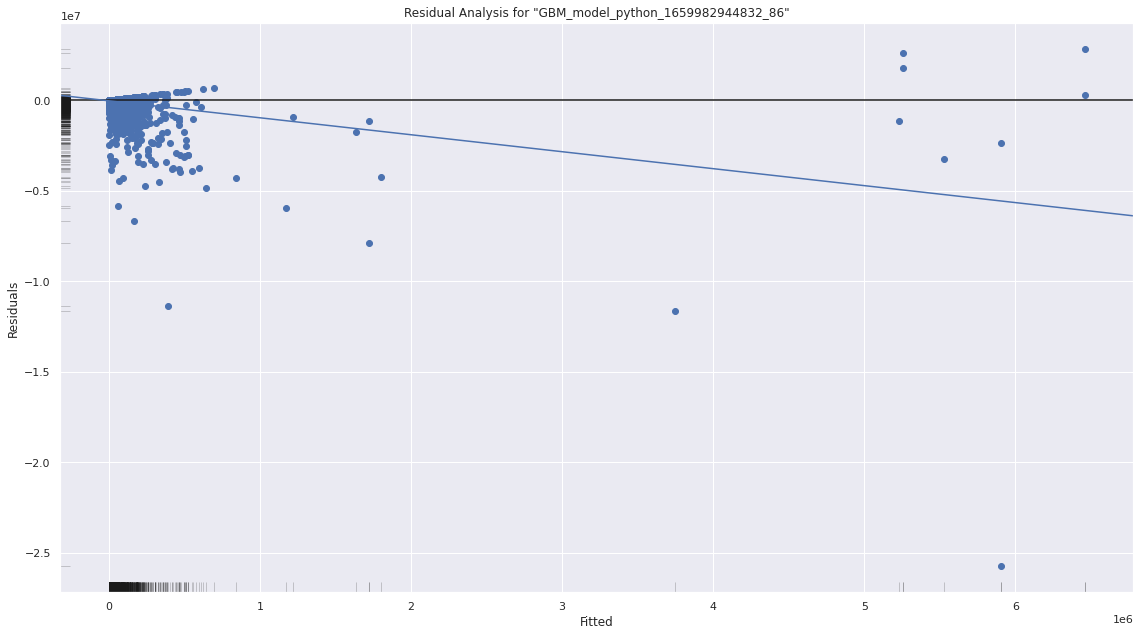

<h2o.plot._plot_result._MObject at 0x7fe75b6171c0>

In [0]:
# Predicted v Error Graph
## Uses transformed results (not $$)

## Linear line of non spenders and their residuals
###### This seems to be due to non-spenders having  active purchase history the past few years, or historically big spenders
## Spenders increasing variance between predictions and residuals
##### Accounts with lower and higher predictions seem to have higher residuals (if an account spends 600K, is 50k error acceptable? 100k?)
##### Due to wide spend range 
##### Likely missing some key predictors (esp related to customer action & timeframe)


### Check that some big errors maybe are a result of a missed opportunity / mishandled account
###### Check How being covered; terr v major v digital (bc 1cct Manage : M M account)


saved_model.residual_analysis_plot(score_h2o[all_features])

Out[14]:

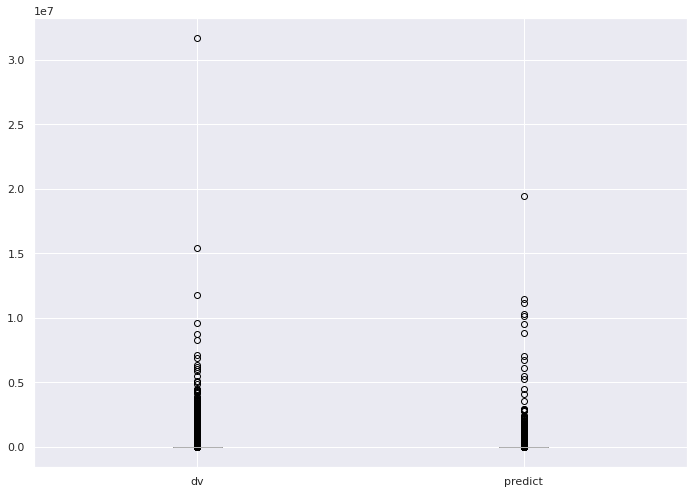

<AxesSubplot:>

In [0]:
## Boxplot to show general spread + outliers of dv vs predictions
df_pd.boxplot(column=['dv','predict'])


Out[15]:

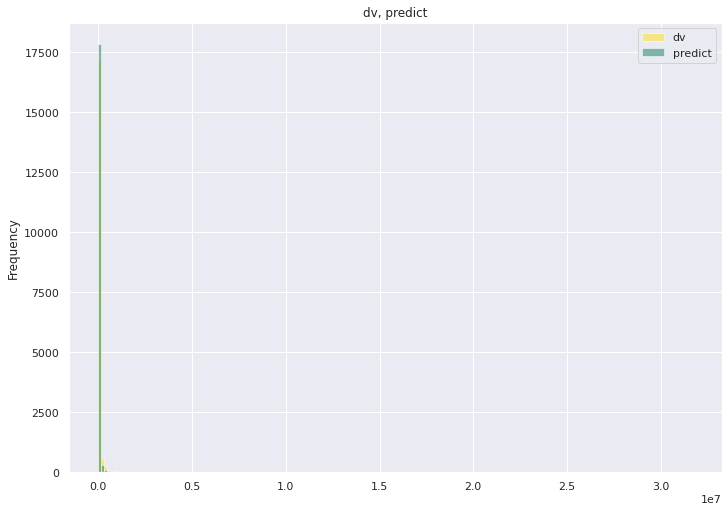

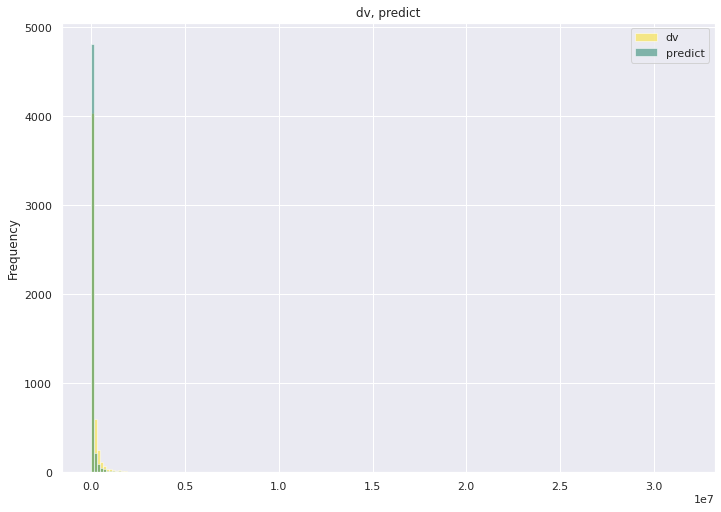

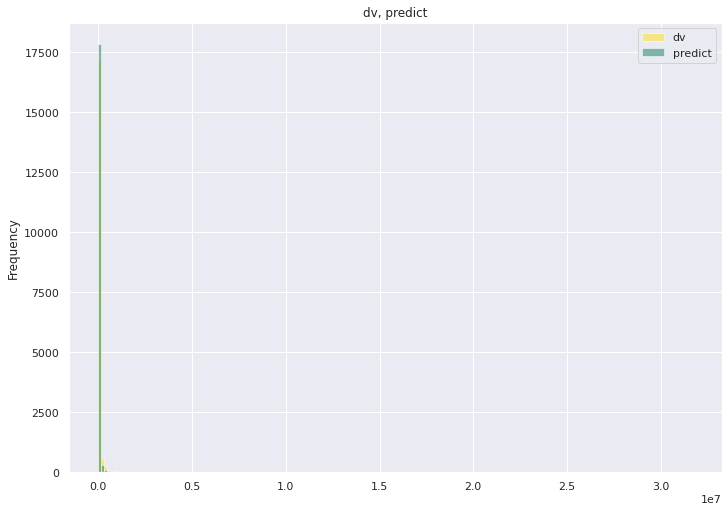

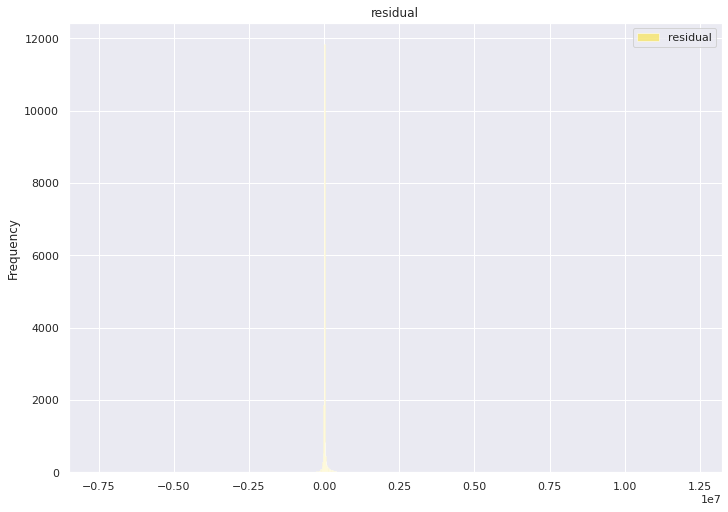

<AxesSubplot:title={'center':'residual'}, ylabel='Frequency'>

In [0]:
dv_predicts = ['dv','predict','residual']


## View Histogram of DV & Predict to compare distributions
#### Can see the DV distribution has a tweedie distribution (excess 0's and then right skewed)
var1 = dv_predicts[0]
var2 = dv_predicts[1]
df_pd[[var1, var2]].plot.hist(title=var1 + ', ' + var2,color=['#FFE41B', '#157E61'], alpha=0.5, bins=200)

## View Histogram of DV & Predict to compare distributions of SPENDERS
#### Spenders are right skewed ; tends to underpredict
var1 = dv_predicts[0]
var2 = dv_predicts[1]
df_pd[spend_mask][[var1, var2]].plot.hist(title=var1 + ', ' + var2,color=['#FFE41B', '#157E61'], alpha=0.5, bins=200)

## View Histogram of DV & Predict to compare distributions of NON SPENDERS
#### Generally over predicts 
var1 = dv_predicts[0]
var2 = dv_predicts[1]
df_pd[[var1, var2]].plot.hist(title=var1 + ', ' + var2,color=['#FFE41B', '#157E61'], alpha=0.5, bins=200)

#Residuals frequency hist
### Normal
var2 = dv_predicts[2]
df_pd[[var2]].plot.hist(title=var2,color=['#FFE41B'], alpha=0.5, bins=1000)

Out[16]:

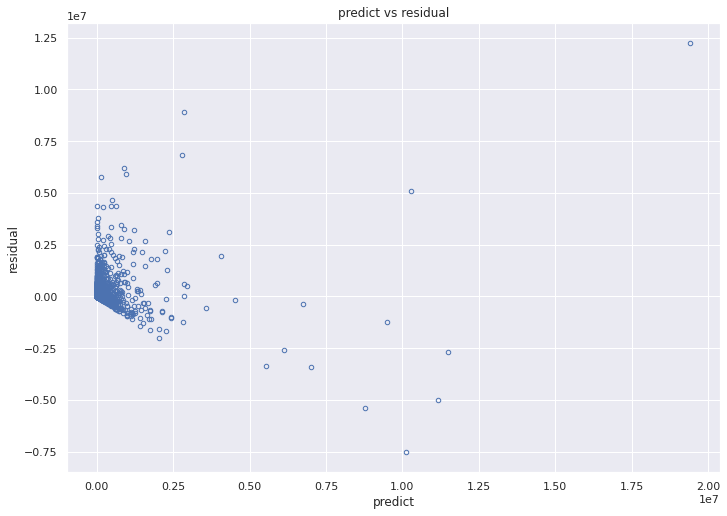

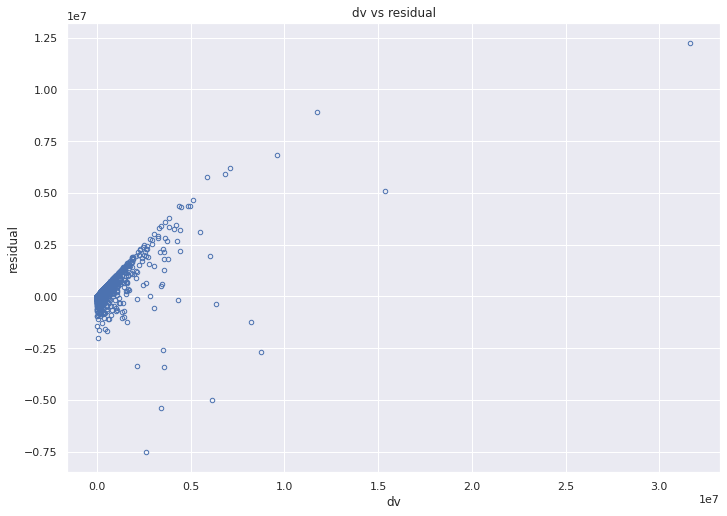

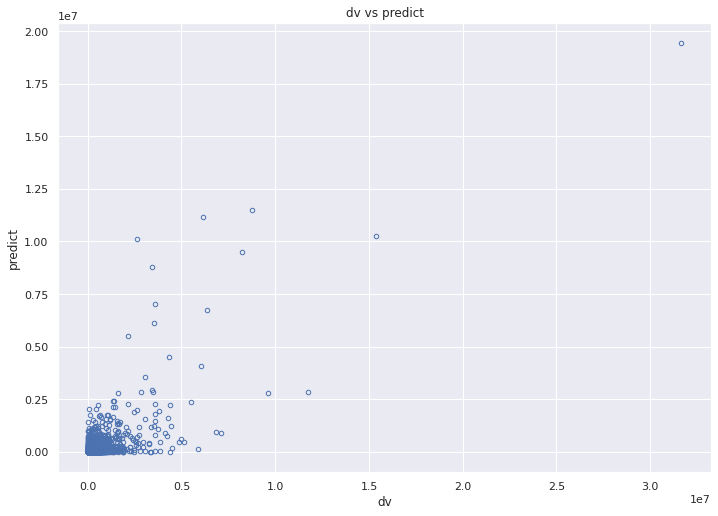

<AxesSubplot:title={'center':'dv vs predict'}, xlabel='dv', ylabel='predict'>

In [0]:
## Plots using $$ dollars for spenders

#fitted vs residual 
### Heteroskedastic in nature
df_pd[spend_mask].plot.scatter(x='predict',y='residual', title='predict vs residual',edgecolors='b',color='none')

# actual v residual values 
### Error increases as actual spend increases 
##### Indication of unknown error being related to increased spend (need more information to account for this error)
df_pd[spend_mask].plot.scatter(x=dv,y='residual', edgecolors='b',color='none',title='dv vs residual')

# actual v predicted values
df_pd[spend_mask].plot.scatter(x=dv,y='predict',edgecolors='b',color='none', title='dv vs predict')


### Spend Bin Analysis

> Confusion matrix and related matrix

In [0]:
# Possible spend bin related columns to use for this view:
## spend_bins / predict_spend_bins , simple_spend_bins / simple_predict_spend_bins, spend_bin_intervals / predict_spend_bin_intervals, simple_spend_bin_intervals / simple_predict_spend_bin_intervals, other_simple_spend_bins / other_simple_predict_spend_bins, other_simple_spend_bin_intervals / other_simple_predict_spend_bin_intervals

# Intervals: bins=[float('-inf'),1000,10000,100000,500000,1000000, float('inf')]
# Corresponding labels: ['1.non_spend','2.low_spend','3.low_med_spend','4.med_spend','5.med_high_spend','6.high_spend']
y_actual_col = 'spend_bins'
y_predict_col = 'predict_spend_bins'

y_actual = df_pd[y_actual_col]
y_pred = df_pd[y_predict_col]

df_conf = pd.crosstab(y_pred,y_actual)
df_conf


Out[17]:

spend_bins,1.non_spend,2.low_spend,3.low_med_spend,4.med_spend,5.med_high_spend,6.high_spend
predict_spend_bins,,,,,,
1.non_spend,7434,342,746,217,23,6
2.low_spend,3585,263,738,259,23,3
3.low_med_spend,2135,198,819,614,75,40
4.med_spend,218,28,153,233,62,54
5.med_high_spend,13,2,12,32,24,36
6.high_spend,10,1,2,10,11,54


In [0]:
df_conf = df_conf.reset_index()
true_pos_pct = {}
i = 0

# Create dictionary of (total accounts, true pos rate) per group
for col in df_conf.columns[1:]:
  try:
    true = df_conf[df_conf[y_predict_col] == col][col][i]
    i+=1
    total = df_conf[col].sum()
    true_pos_pct[col] = (str(total) + ' actuals', str(total / df_pd.shape[0] * 100) + '% baseline',str(round((true / total * 100),2)) + '% true pos')
  except IndexError:
    pass
  
  
print("(Total Actual Accounts, Tru Pos Rate) Per Group:\n")
pprint.pprint(true_pos_pct)

# Compare to baseline to know if higher or lower

# delta btwn predict & then (avg 3ry & lastyr) ; for super high $$

(Total Actual Accounts, Tru Pos Rate) Per Group:

{'1.non_spend': ('13395 actuals',
 '72.50338294993234% baseline',
 '55.5% true pos'),
 '2.low_spend': ('834 actuals',
 '4.514208389715832% baseline',
 '31.53% true pos'),
 '3.low_med_spend': ('2470 actuals',
 '13.369418132611639% baseline',
 '33.16% true pos'),
 '4.med_spend': ('1365 actuals',
 '7.388362652232747% baseline',
 '17.07% true pos'),
 '5.med_high_spend': ('218 actuals',
 '1.1799729364005414% baseline',
 '11.01% true pos'),
 '6.high_spend': ('193 actuals',
 '1.044654939106901% baseline',
 '27.98% true pos')}

Out[19]:

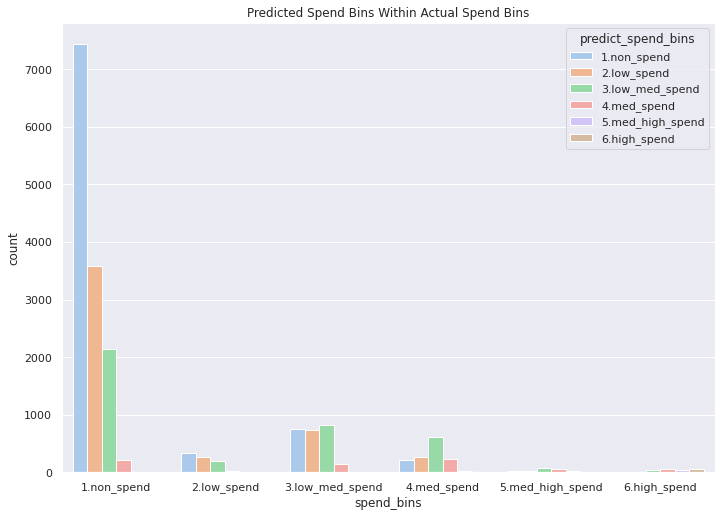

Text(0.5, 1.0, 'Predicted Spend Bins Within Actual Spend Bins')

In [0]:
## Graph of X axis represents ACTUAL spend bins ; COLOR bars represents PREDICTION bins within ACTUAL bins
####
sns.countplot(x=y_actual_col, hue=y_predict_col, palette="pastel", order=sorted(df_pd[y_actual_col].unique()), hue_order=sorted(df_pd[y_predict_col].unique()), data=df_pd).set_title('Predicted Spend Bins Within Actual Spend Bins')



### Given our top 10% of customers that spend the most; segment or seg
####### Check out tho their residuals and etc. difference to see if their behavior per these groups seems diff
### Check features imp per segment tho and include in model then next step oissb ^^

### Error

> POV: Error is X% of actual spend

In [0]:
## How are % error bins distributed amongst the spend bins?

# Spend bin Intervals: bins=[float('-inf'),1000,10000,100000,500000,1000000, float('inf')]
# Corresponding labels: ['1.non_spend','2.low_spend','3.low_med_spend','4.med_spend','5.med_high_spend','6.high_spend']
ftr = 'pct_error_bins'
dist_lst = pysh.get_distinct_col_values(df_spark, [ftr])[ftr]

groupby_val = 'spend_bins'

stmt = 'select ' + groupby_val + ' , count(*) total '

list_query = [', sum(case when ' + ftr + ' = "' + col + '" then 1 end) / count(*) * 100 as `pct_pct_error_' + col + '`'  for col in dist_lst]
list_query.sort(reverse=False)
str_query = "".join(list_query)
stmt = stmt + str_query + ' from data where ' + dv + ' > 1000 group by ' + groupby_val + ' order by ' + groupby_val + ' asc'
display(spark.sql(stmt))

spend_bins,total,"pct_pct_error_(-inf, 0.05]","pct_pct_error_(0.05, 0.1]","pct_pct_error_(0.1, 0.2]","pct_pct_error_(0.2, 0.3]","pct_pct_error_(0.3, 0.4]","pct_pct_error_(0.4, 0.5]","pct_pct_error_(0.5, 0.6]","pct_pct_error_(0.6, 0.7]","pct_pct_error_(0.7, 0.8]","pct_pct_error_(0.8, 0.9]","pct_pct_error_(0.9, 1.0]","pct_pct_error_(1.0, inf]",pct_pct_error_nan
2.low_spend,834,1.9184652278177456,2.158273381294964,2.5179856115107913,3.7170263788968825,2.278177458033573,4.316546762589928,3.357314148681055,4.436450839328537,4.436450839328537,7.913669064748201,34.65227817745804,28.297362110311752,null
3.low_med_spend,2470,1.8218623481781375,1.6194331983805668,3.0364372469635628,3.2388663967611335,3.279352226720648,4.574898785425101,4.2105263157894735,5.62753036437247,7.246963562753036,10.688259109311742,44.008097165991906,10.647773279352228,null
4.med_spend,1365,1.3186813186813187,1.1721611721611722,2.564102564102564,1.5384615384615385,3.15018315018315,2.490842490842491,4.322344322344322,6.666666666666667,9.010989010989011,16.043956043956044,47.399267399267394,4.322344322344322,null
5.med_high_spend,218,1.3761467889908259,null,4.587155963302752,3.211009174311927,1.834862385321101,3.211009174311927,7.339449541284404,4.128440366972478,9.63302752293578,12.844036697247708,49.08256880733945,2.7522935779816518,null
6.high_spend,193,1.0362694300518136,2.5906735751295336,3.6269430051813467,5.181347150259067,2.5906735751295336,6.217616580310881,9.32642487046632,6.217616580310881,11.917098445595855,15.025906735751295,34.715025906735754,1.5544041450777202,null


Out[21]:

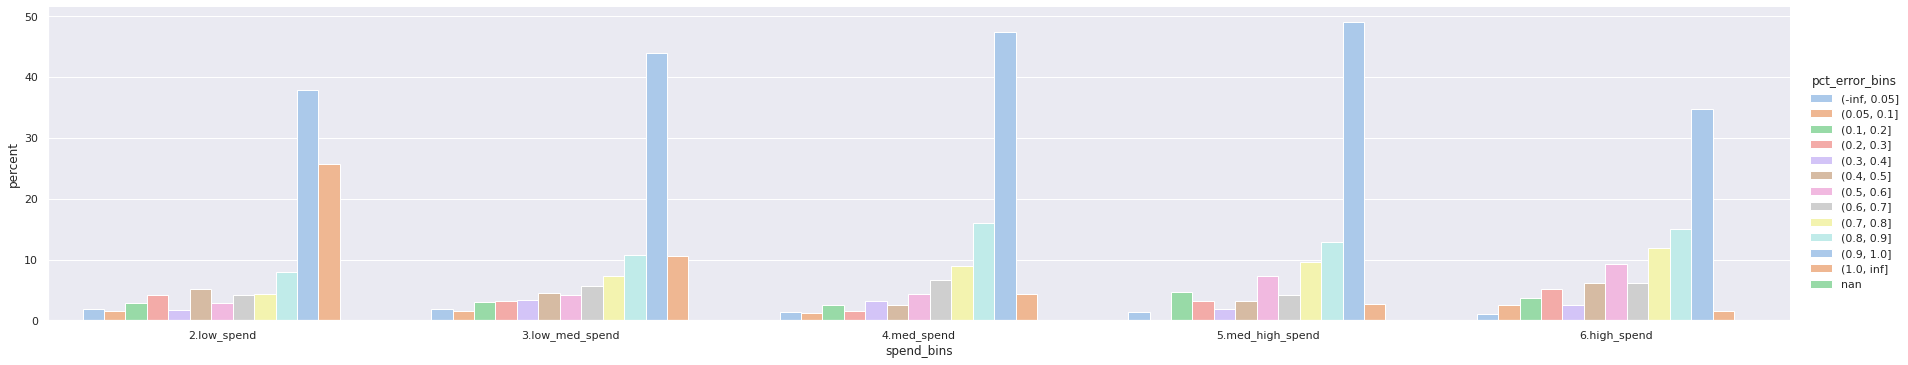

<seaborn.axisgrid.FacetGrid at 0x7fe759e0f8b0>

In [0]:
### Visualize how accounts in each spend bin falls into the pct error bins (based on above table)
##### Focus on spending accounts

### Code to double check pcts are accurately summing to 1
# (df_pd[df_pd[dv] > 3000]
# .groupby('spend_bins')['pct_error_bins']
# .value_counts(normalize=True)).to_frame().groupby('spend_bins')['pct_error_bins'].sum()




# Spend bin Intervals: bins=[float('-inf'),1000,10000,100000,500000,1000000, float('inf')]
# Corresponding labels: ['1.non_spend','2.low_spend','3.low_med_spend','4.med_spend','5.med_high_spend','6.high_spend']
(df_pd[df_pd[dv] > 3000]
.groupby('spend_bins')['pct_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='pct_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['pct_error_bins'].unique()),aspect=5))

Out[22]:

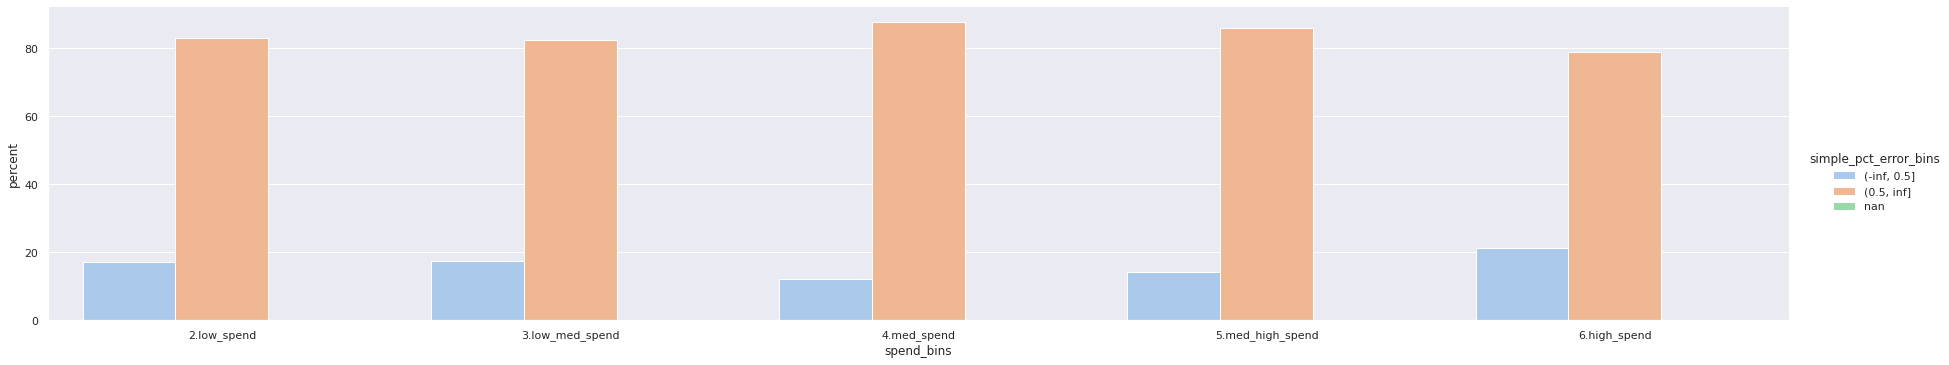

<seaborn.axisgrid.FacetGrid at 0x7fe759c960a0>

In [0]:
### Create columns related to error bins

pct_error_bins=[float('-inf'), .5,float('inf')]
df_pd['simple_pct_error_bins'] = pd.cut(x=df_pd.err_is_X_times_spend, right=True,include_lowest=True,bins=pct_error_bins).astype(str)

df_pd['spend_bins'] = df_pd['spend_bins'].astype(str)
(df_pd[df_pd[dv] > 3000]
.groupby('spend_bins')['simple_pct_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
 .pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='simple_pct_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['simple_pct_error_bins'].unique().astype(str)),aspect=5))



## .pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='simple_pct_error_bins',kind='bar', palette='pastel'))


In [0]:
##.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='simple_pct_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['simple_pct_error_bins'].unique()),aspect=5))



In [0]:
df_pd['spend_bins']

Out[27]: 0 1.non_spend
1 1.non_spend
2 1.non_spend
3 3.low_med_spend
4 4.med_spend
 ... 
18470 1.non_spend
18471 1.non_spend
18472 1.non_spend
18473 1.non_spend
18474 1.non_spend
Name: spend_bins, Length: 18475, dtype: object

In [0]:
pct_error_bins=[float('-inf'), .5,float('inf')]
df_pd['simple_pct_error_bins'] = pd.cut(x=df_pd.err_is_X_times_spend, right=True,include_lowest=True,bins=pct_error_bins).astype(str)



df_pd['spend_bins'] = df_pd['spend_bins'].astype(str)

> POV: (prediction / actual)

In [0]:
display(df_pd[['pred_ratio']].quantile([0.25,0.5,0.75,0.95,0.99]).reset_index())

index,pred_ratio
0.25,0.0218108836438183
0.5,0.17492504251543067
0.75,0.8068889111607684
0.95,7.6039060881062035
0.99,55.72327828247245


In [0]:
df_pd.over_under_predict.value_counts()

Out[33]: 0 7990
 1 6736
-1 3749
Name: over_under_predict, dtype: int64

In [0]:
print(df_pd[df_pd[dv]>=100000]['account_id'].count())
print(df_pd[(df_pd['predict']>=100000)&(df_pd[dv]>=100000)]['account_id'].count())

1776
516

In [0]:
print(df_pd[df_pd[dv]>=1000000]['account_id'].count())
print(df_pd[(df_pd['predict']>=1000000)&(df_pd[dv]>=1000000)]['account_id'].count())

193
54

In [0]:
display(df_pd[df_pd['over_under_predict'] == 1][['pred_ratio']].quantile([0.25,0.5,0.75,0.95,0.99,1]).reset_index())

index,pred_ratio
0.25,1.8373719892042097
0.5,3.2924430809244574
0.75,9.226366332278257
0.95,63.40149869171749
0.99,352.0336555939795
1.0,6012.494056509771


Out[48]:

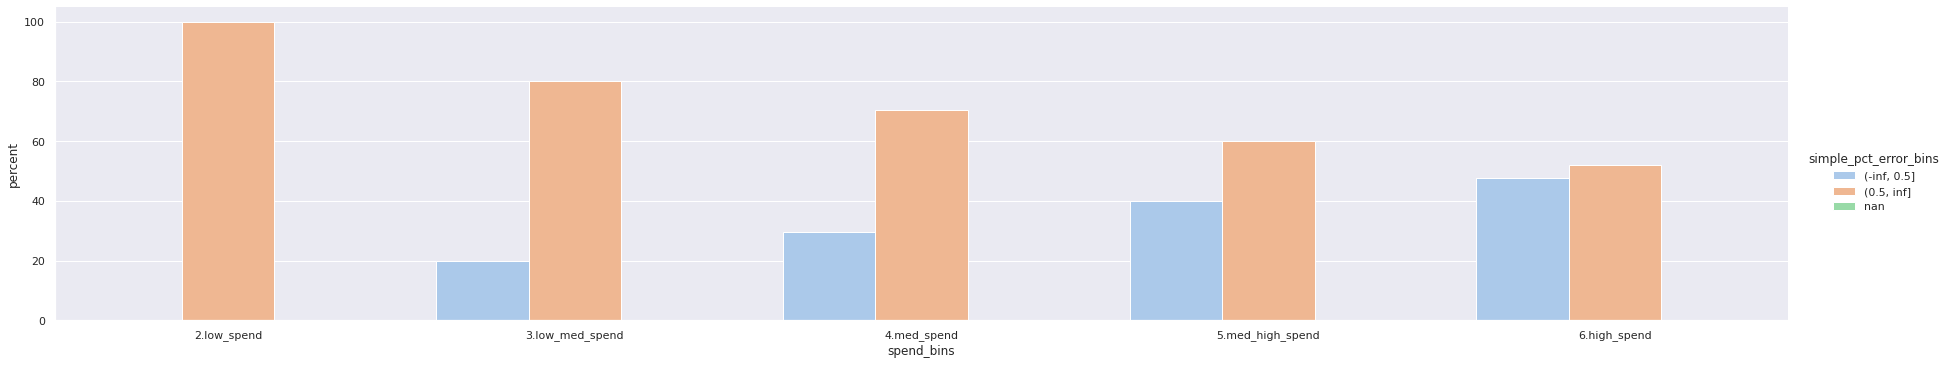

<seaborn.axisgrid.FacetGrid at 0x7fe75b832c40>

In [0]:
### Graph out pct errors calculated via : pred / actual for over predicting accounts
### When under predicting, we want to see the pred_ratio close to 1 (right skewed)

over_predict_msk = df_pd['over_under_predict'] == 1


pct_error_bins=[float('-inf'),1,2,5,15,100,200,float('inf')]
df_pd['other_pct_error_bins'] = pd.cut(x=df_pd.pred_ratio, right=True,include_lowest=True,bins=pct_error_bins).astype(str)


(df_pd[(df_pd[dv] > 3000) & over_predict_msk]
.groupby('spend_bins')['simple_pct_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='simple_pct_error_bins',kind='bar', palette='pastel', hue_order=sorted(df_pd['simple_pct_error_bins'].unique().astype(str)),aspect=5))

In [0]:
display(df_pd[df_pd['over_under_predict'] == -1][['pred_ratio']].quantile([0.25,0.5,0.75,0.95,0.99,1]).reset_index())

index,pred_ratio
0.25,0.007798564697487161
0.5,0.06597900383360611
0.75,0.2343436562800317
0.95,0.6674004330567379
0.99,0.8871286090605237
1.0,0.9953937478371819


Out[38]:

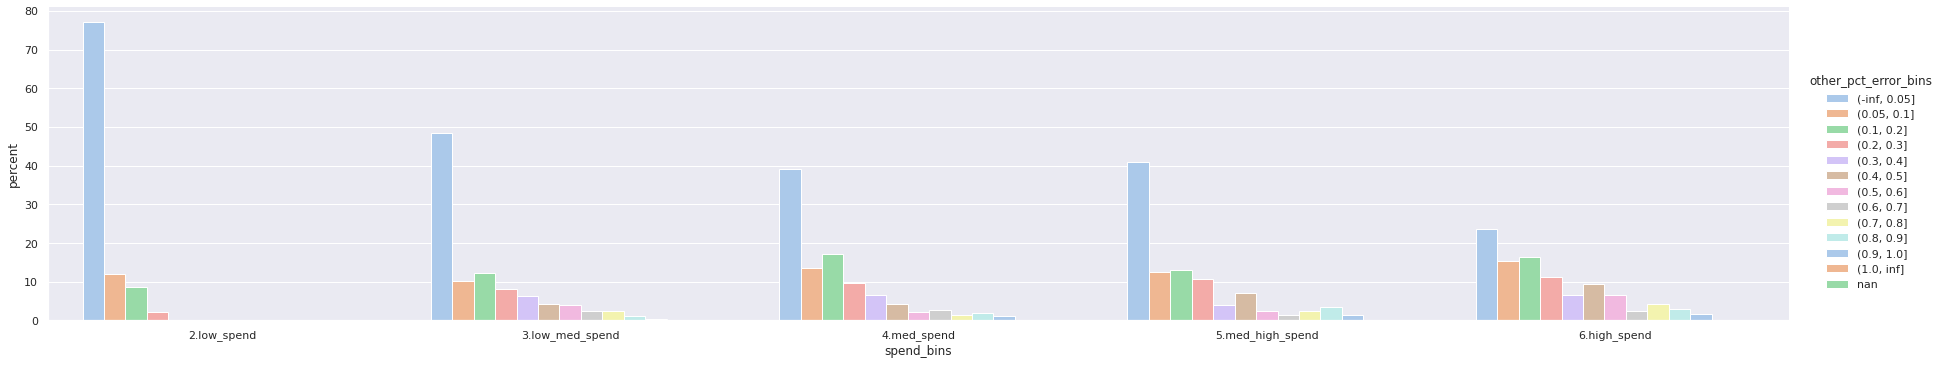

<seaborn.axisgrid.FacetGrid at 0x7fe759a28520>

In [0]:
### Graph out pct errors calculated via : pred / actual for under predicting accounts
### When under predicting, we want to see the pred_ratio close to 1 (left skewed)

under_predict_msk = df_pd['over_under_predict'] == -1

df_pd['pred_ratio'] = np.where(df_pd['dv']>0, df_pd['predict'] / df_pd['dv'], np.nan)

pct_error_bins=[float('-inf'),.05,.1,.2,.3,.4, .5,.6,.7,.8,.9,1,float('inf')]
df_pd['other_pct_error_bins'] = pd.cut(x=df_pd.pred_ratio, right=True,include_lowest=True,bins=pct_error_bins).astype(str)


(df_pd[(df_pd[dv] > 3000) & under_predict_msk]
.groupby('spend_bins')['other_pct_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='other_pct_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['other_pct_error_bins'].unique().astype(str)),aspect=5))

Out[39]:

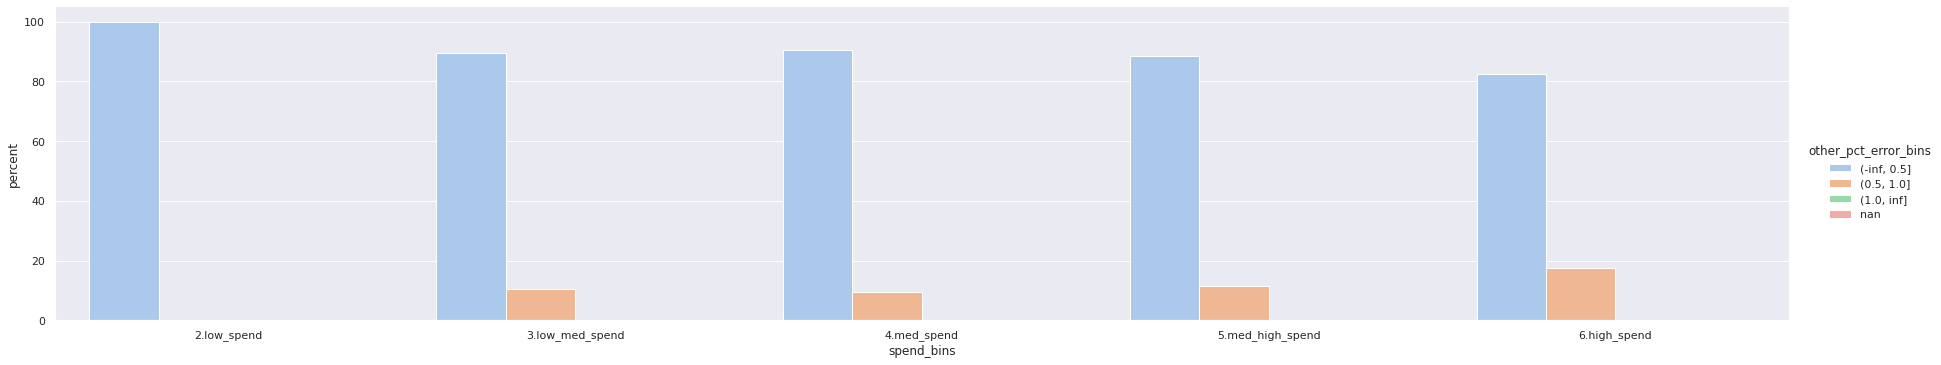

<seaborn.axisgrid.FacetGrid at 0x7fe75be98ca0>

In [0]:
### Graph out pct errors calculated via : pred / actual for under predicting accounts
### When under predicting, we want to see the pred_ratio close to 1 (left skewed)

under_predict_msk = df_pd['over_under_predict'] == -1

df_pd['pred_ratio'] = np.where(df_pd['dv']>0, df_pd['predict'] / df_pd['dv'], np.nan)

pct_error_bins=[float('-inf'),.5,1,float('inf')]
df_pd['other_pct_error_bins'] = pd.cut(x=df_pd.pred_ratio, right=True,include_lowest=True,bins=pct_error_bins).astype(str)


(df_pd[(df_pd[dv] > 3000) & under_predict_msk]
.groupby('spend_bins')['other_pct_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='other_pct_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['other_pct_error_bins'].unique().astype(str)),aspect=5))

> View non & low spenders per RAW error bin

In [0]:
## How are raw error bins distributed amongst the spend bins, for low/non spenders?


# Spend bin Intervals: bins=[float('-inf'),1000,10000,100000,500000,1000000, float('inf')]
# Corresponding labels: ['1.non_spend','2.low_spend','3.low_med_spend','4.med_spend','5.med_high_spend','6.high_spend']
ftr = 'raw_error_bins'
dist_lst = pysh.get_distinct_col_values(df_spark, [ftr])[ftr]

groupby_val = 'spend_bins'

stmt = 'select ' + groupby_val + ' , count(*) total '

list_query = [', sum(case when ' + ftr + ' = "' + col + '" then 1 end) / count(*) * 100 as `pct_raw_error_' + col + '`'  for col in dist_lst]
list_query.sort(reverse=False)
str_query = "".join(list_query)
stmt = stmt + str_query + ' from data where ' + dv + ' <= 3000 group by ' + groupby_val + ' order by ' + groupby_val + ' asc'
display(spark.sql(stmt))

spend_bins,total,"pct_raw_error_(-inf, 500.0]","pct_raw_error_(1000.0, 3000.0]","pct_raw_error_(10000.0, 15000.0]","pct_raw_error_(100000.0, 150000.0]","pct_raw_error_(1000000.0, 3000000.0]","pct_raw_error_(10000000.0, inf]","pct_raw_error_(15000.0, 20000.0]","pct_raw_error_(150000.0, 200000.0]","pct_raw_error_(20000.0, 50000.0]","pct_raw_error_(200000.0, 500000.0]","pct_raw_error_(3000.0, 7000.0]","pct_raw_error_(3000000.0, 7000000.0]","pct_raw_error_(500.0, 1000.0]","pct_raw_error_(50000.0, 100000.0]","pct_raw_error_(500000.0, 700000.0]","pct_raw_error_(7000.0, 10000.0]","pct_raw_error_(700000.0, 1000000.0]","pct_raw_error_(7000000.0, 10000000.0]"
1.non_spend,13395,48.74206793579694,12.452407614781634,4.628592758491975,0.7838745800671892,0.0671892497200448,null,2.7622247107129527,0.2687569988801792,6.114221724524076,0.5748413587159388,10.160507652108997,0.007465472191116087,6.79357969391564,2.426278462112729,0.03732736095558044,4.120940649496081,0.0597237775289287,null
2.low_spend,186,9.67741935483871,46.236559139784944,4.301075268817205,1.0752688172043012,null,null,3.763440860215054,null,7.526881720430108,0.5376344086021506,7.526881720430108,null,10.75268817204301,2.6881720430107525,0.5376344086021506,5.376344086021505,null,null


Out[41]:

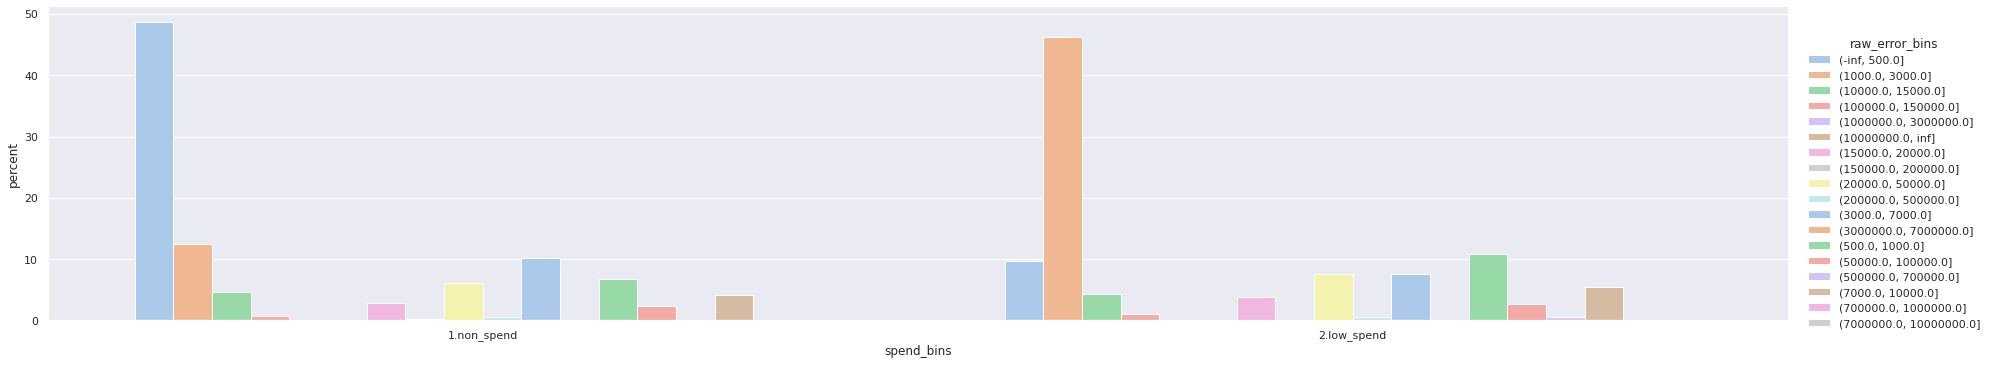

<seaborn.axisgrid.FacetGrid at 0x7fe759f0bbb0>

In [0]:
### Visualize how accounts in each spend bin falls into the RAW error bins (based on above table)
##### Focus on non spending and low spending accounts



# Spend Intervals: bins=[float('-inf'),1000,10000,100000,500000,1000000, float('inf')]
# Corresponding labels: ['1.non_spend','2.low_spend','3.low_med_spend','4.med_spend','5.med_high_spend','6.high_spend']
(df_pd[df_pd[dv] <= 3000]
.groupby('spend_bins')['raw_error_bins']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='spend_bins',y='percent',hue='raw_error_bins',kind='bar', palette='pastel',hue_order=sorted(df_pd['raw_error_bins'].unique().astype(str)),aspect=5))


### Assess Rankings

In [0]:
## Compare deciles

group_list = ['spend_deciles','predict_spend_deciles']
display(df_pd.groupby(group_list).agg({'account_id':'count',dv:['mean','median'],'predict':['mean','median']}).reset_index())

"('spend_deciles', '')","('predict_spend_deciles', '')","('account_id', 'count')","('dv', 'mean')","('dv', 'median')","('predict', 'mean')","('predict', 'median')"
8,1,810,817697.128074074,359831.21499999997,478142.1889770153,152983.2126446385
8,2,341,306834.9527565983,205011.04,28691.54726315403,27670.347704293086
8,3,193,274899.70476683934,186702.15,11842.659772568546,11855.533774636535
8,4,130,273198.77607692307,189485.785,4968.163896789552,4822.48370290946
8,5,94,264244.18457446806,185659.245,2244.1008136110954,2208.5761741992924
8,6,73,237730.86013698633,165810.54,828.9872780392195,823.7966086576613
8,7,65,237695.84415384612,184693.88,244.20543955331752,233.95004331492862
8,8,55,270522.7734545456,165110.83,65.83508700828429,69.1938772160637
8,9,47,334180.740851064,172333.5,7.566645766619228,6.650852912463714
8,10,40,294191.32924999995,181132.415,0.13477927859358907,0.03294273403038898


In [0]:
#Average distance btwn actual rank & predict rank 
#### Note rankings are awk for non/low spenders
avg_abs_rank_dist = (df_pd.groupby(['spend_bins'])['abs_rank_dist'].mean())
median_abs_rank_dist = df_pd.groupby(['spend_bins'])['abs_rank_dist'].median()


pd.concat([avg_abs_rank_dist.rename('avg_abs_rank_dist'), median_abs_rank_dist.rename('median_abs_rank_dist')], axis=1)

Out[44]:

,avg_abs_rank_dist,median_abs_rank_dist
spend_bins,,
1.non_spend,4388.357074,4078.0
2.low_spend,4981.169664,3947.0
3.low_med_spend,4875.464777,3224.0
4.med_spend,3843.698535,1825.0
5.med_high_spend,2899.270642,921.5
6.high_spend,1115.347150,150.0


### View feature relationships to DV

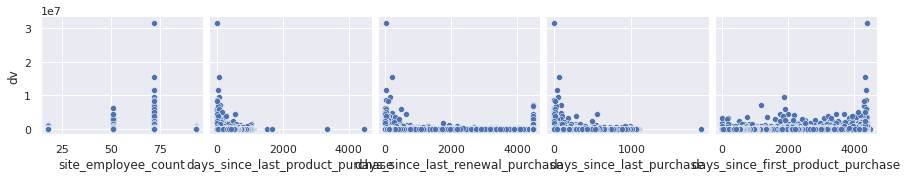

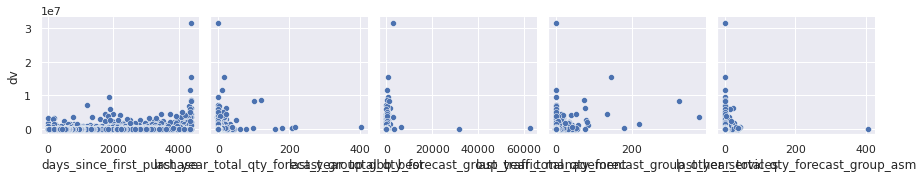

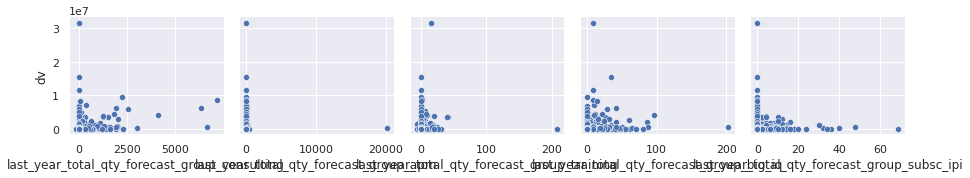

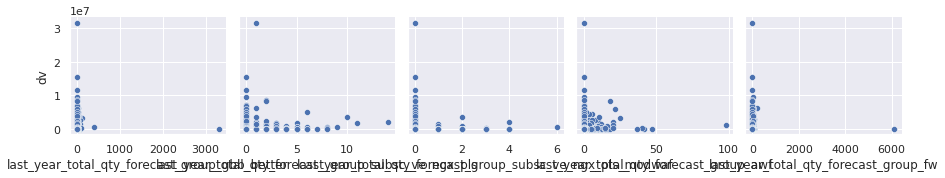

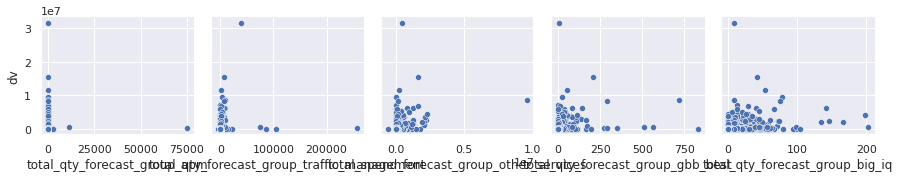

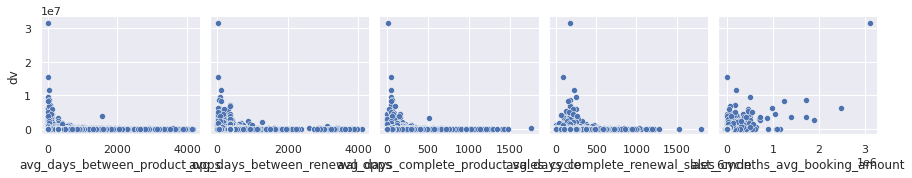

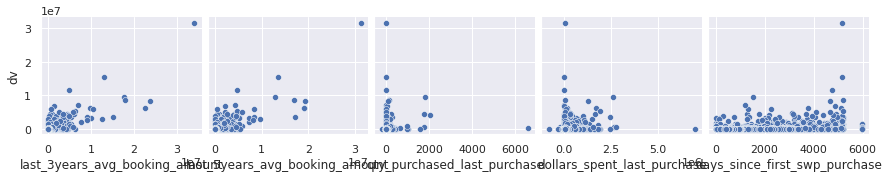

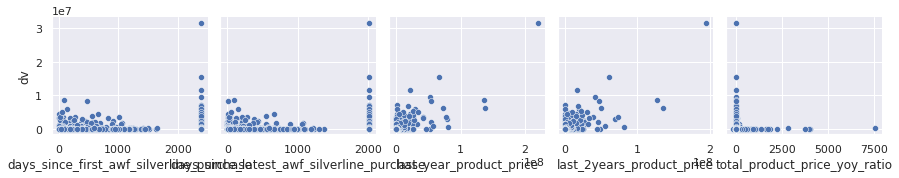

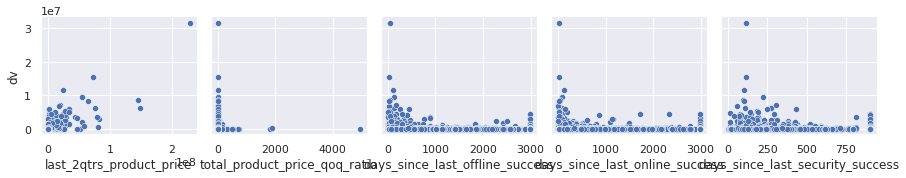

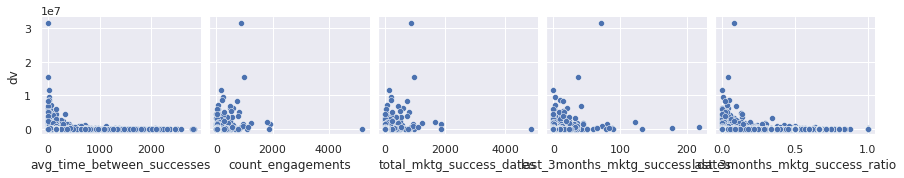

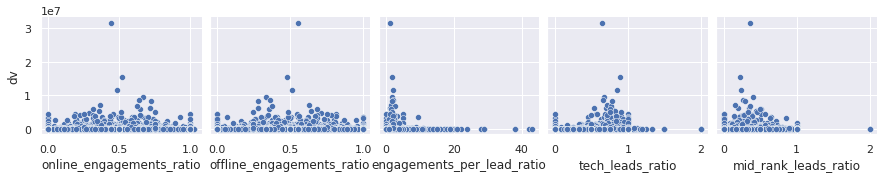

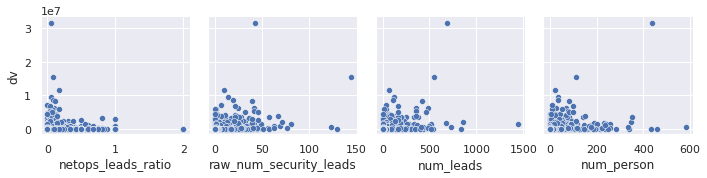

In [0]:
for i in range(0, len(numerical_features) - 1, 6):
  sns.pairplot(df_pd, x_vars=numerical_features[i:i+5],y_vars=[dv])